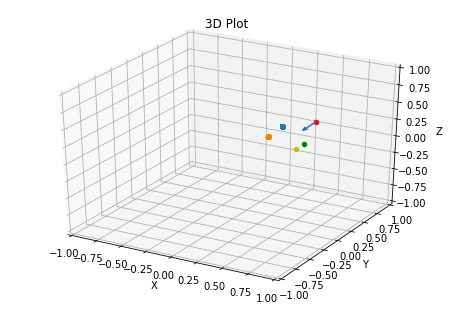

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
#https://math.stackexchange.com/questions/82602/how-to-find-camera-position-and-rotation-from-a-4x4-matrix


class Plot3d:
    def __init__(self):
        fig = plt.figure()
        ax = p3.Axes3D(fig)
        # Setting the axes properties
        l = 1
        if True:
            ax.set_xlim3d([-l, l])
            ax.set_ylim3d([-l, l])
            ax.set_zlim3d([-l, l])

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Plot')
        self.ax = ax
        pass

    def draw_points(self,points):
        self.ax.scatter(points[:,0],points[:,1],points[:,2])
        pass
    def draw_point(self,p,c):
        self.ax.scatter(p[0],p[1],p[2],c=c)
        pass
    def draw_vector(self,s,e):
        d = e-s
        self.ax.quiver(s[0],s[1],s[2],d[0],d[1],d[2])
        pass
    
    
class CameraTransform:
    def __init__(self,R,t):
        # model view matrix 
        MV = np.hstack((R,t))
        self.model_view = np.vstack((MV,(0,0,0,1)))
        self.camera_position = -np.dot(R.T,t).reshape((-1))
        self.camera_orientation = np.dot(R.T,(0,0,1))
        pass
    def world_to_cam(self, point_in_world):
        p = np.hstack((point_in_world,1))
        p = np.dot(self.model_view, p)
        p = p[:3]/p[3]
        return p
    def cam_to_world(self, point_in_camera):
        p = np.hstack((point_in_camera,1))
        from numpy.linalg import inv
        p = np.dot(inv(self.model_view),p)
        p = p[:3]/p[3]
        return p
    def print(self):
        print("position:",self.camera_position)
        print("orientation:",self.camera_orientation)

R = [ 2.3378803662741476e-02, 9.9967347165206788e-01,
1.0314146324401974e-02, 7.8244732224413349e-01,
-1.1874935764705663e-02, -6.2260354465226841e-01,
-6.2227776712034633e-01, 2.2626002202914774e-02,
-7.8246945280440794e-01 ]
t = [ -1.4090767998063891e-02, -2.2633313622261866e-01,
1.0049478890295083e+00 ]
R = np.array(R).reshape((3,3))
t = np.array(t).reshape((3,1))
cam = CameraTransform(R,t)

# points in the camera axis
hand_left=[-0.08309672027826309, 0.13976304233074188, 0.39112165570259094]
hand_right=[0.09550348855555058, 0.1327906884253025, 0.42547494173049927]
hand_left = cam.cam_to_world(hand_left)
hand_right = cam.cam_to_world(hand_right)

robot_pos = np.load('robot_arms.npy')

p3d = Plot3d()
p3d.draw_point(cam.camera_position, c='r')
p3d.draw_vector(cam.camera_position, cam.camera_position+cam.camera_orientation*0.2)
p3d.draw_point(hand_left, c='y')
p3d.draw_point(hand_right, c='g')
p3d.draw_points(robot_pos[:,:3])
p3d.draw_points(robot_pos[:,-3:])
plt.show()

In [4]:
# intrinsic matrix
ppx = 311.560699463
ppy = 251.426208496
fx = 619.985595703
fy = 619.985656738
dev_depth_scale = 0.000124986647279
def deproject(p):
    x = (px - ppx)/fx
    y = (py - ppy)/fy
    depth = depth_origin*dev_depth_scale

# point to pixel
def project(p):
    px = fx*p[0]+ppx
    py = fy*p[1]+ppy
    pz = p[2]/dev_depth_scale
    return [px,py,pz]

hand_left=[-0.08309672027826309, 0.13976304233074188, 0.39112165570259094]
print(project(hand_left))
hand_right=[0.09550348855555058, 0.1327906884253025, 0.42547494173049927]
print(project(hand_right))


[260.0419298403155, 338.0772900831259, 3129.3075237830335]
[370.77148670682766, 333.7545306680523, 3404.1631725726484]
